<div style="background-color:  green ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;">Beer Consumption Prediction</h1>
    
</div>

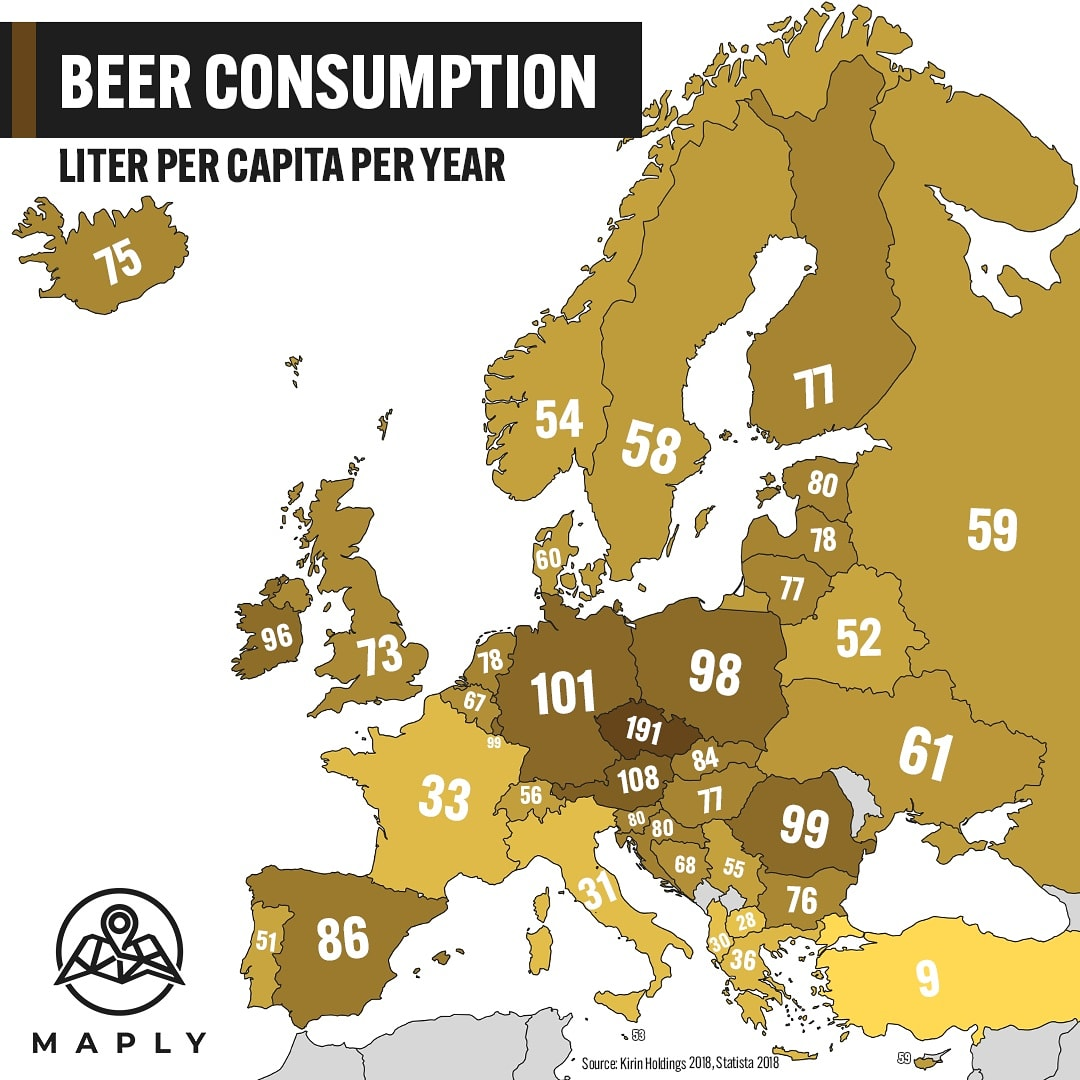

#### This is a regression type of problem in which we will try to predict beer consumption among different age groups.

#### https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

<div style="background-color:  green ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;">ABOUT DATASET</h1>
    
</div>

#### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
import regex as re

#### Loading the dataset

In [2]:
data = pd.read_csv("Consumo_cerveja.csv")

In [3]:
data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
data.rename(columns={"Data":"Date", "Temperatura Media (C)": "Temp_Medium",
                     "Temperatura Minima (C)":"Temp_Min","Temperatura Maxima (C)":"Temp_Max",
                     "Precipitacao (mm)":"Precipitaion", "Final de Semana":"Weekend", 
                     "Consumo de cerveja (litros)":"consumption"}, inplace=True)

<div style="background-color:  green ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> DATA EXPLORATION
</h1>
    
</div>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          365 non-null    object 
 1   Temp_Medium   365 non-null    object 
 2   Temp_Min      365 non-null    object 
 3   Temp_Max      365 non-null    object 
 4   Precipitaion  365 non-null    object 
 5   Weekend       365 non-null    float64
 6   consumption   365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weekend,365.0,0.284932,0.452001,0.000,0.000,0.000,1.000,1.000
consumption,365.0,25.401367,4.399143,14.343,22.008,24.867,28.631,37.937


In [7]:
data.shape

(941, 7)

#### Converting the Object type columns 

In [8]:
data["Date"] = pd.to_datetime(data.Date)

#### Extract day, month and Year from the date column.

In [9]:
data["Day"] = data.Date.dt.day

In [10]:
data['Month'] = data.Date.dt.month

In [11]:
data['Year'] = data.Date.dt.year

In [12]:
data.drop(columns="Date", inplace=True)

In [13]:
data.dropna(inplace=True)

#### Change the datatype into int

In [14]:
data["Day"]= data["Day"].astype("int")
data["Month"]= data["Month"].astype("int")
data["Year"]= data["Year"].astype("int")
data['Weekend'] = data['Weekend'].astype("int")

In [15]:
data.isnull().sum()

Temp_Medium     0
Temp_Min        0
Temp_Max        0
Precipitaion    0
Weekend         0
consumption     0
Day             0
Month           0
Year            0
dtype: int64

In [16]:
data.columns

Index(['Temp_Medium', 'Temp_Min', 'Temp_Max', 'Precipitaion', 'Weekend',
       'consumption', 'Day', 'Month', 'Year'],
      dtype='object')

#### Formating the columns which contains special characters like commas

In [17]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=data[i].str.replace(",",".", regex=True)

In [18]:
data.head()

,Temp_Medium,Temp_Min,Temp_Max,Precipitaion,Weekend,consumption,Day,Month,Year
0,27.3,23.9,32.5,0,0,25.461,1,1,2015
1,27.02,24.5,33.5,0,0,28.972,2,1,2015
2,24.82,22.4,29.9,0,1,30.814,3,1,2015
3,23.98,21.5,28.6,1.2,1,29.799,4,1,2015
4,23.82,21,28.3,0,0,28.900,5,1,2015


In [19]:
data.Year.value_counts()

2015    365
Name: Year, dtype: int64

##### We may drop the year column as there is only one year is present.

In [20]:
data.drop(columns="Year", inplace=True)

#### Lets change the object data type into float.

In [21]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].astype("float")

In [22]:
data.head()

,Temp_Medium,Temp_Min,Temp_Max,Precipitaion,Weekend,consumption,Day,Month
0,27.30,23.9,32.5,0.0,0,25.461,1,1
1,27.02,24.5,33.5,0.0,0,28.972,2,1
2,24.82,22.4,29.9,0.0,1,30.814,3,1
3,23.98,21.5,28.6,1.2,1,29.799,4,1
4,23.82,21.0,28.3,0.0,0,28.900,5,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temp_Medium   365 non-null    float64
 1   Temp_Min      365 non-null    float64
 2   Temp_Max      365 non-null    float64
 3   Precipitaion  365 non-null    float64
 4   Weekend       365 non-null    int32  
 5   consumption   365 non-null    float64
 6   Day           365 non-null    int32  
 7   Month         365 non-null    int32  
dtypes: float64(5), int32(3)
memory usage: 21.4 KB


In [36]:
data.shape

(301, 8)

# <center>Univariate Analysis

## <center>Data visualisation

### Checking for outliers

#### Box plot

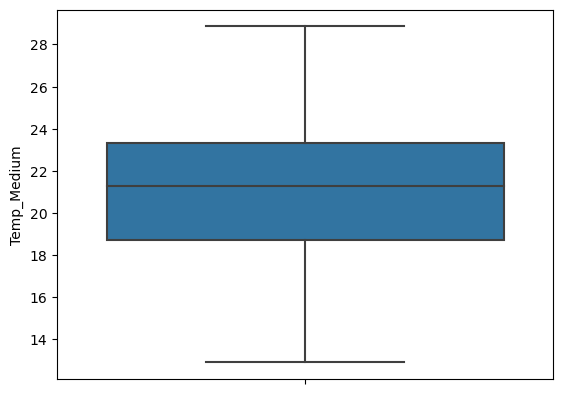

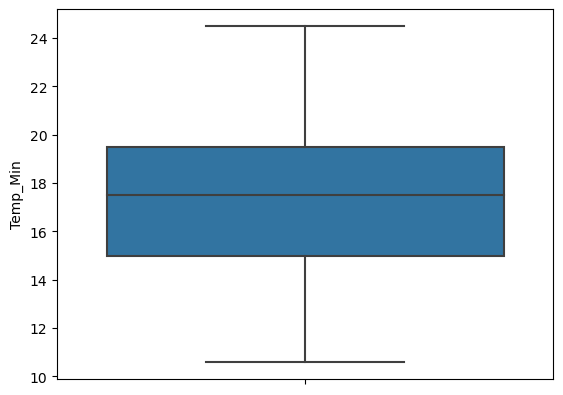

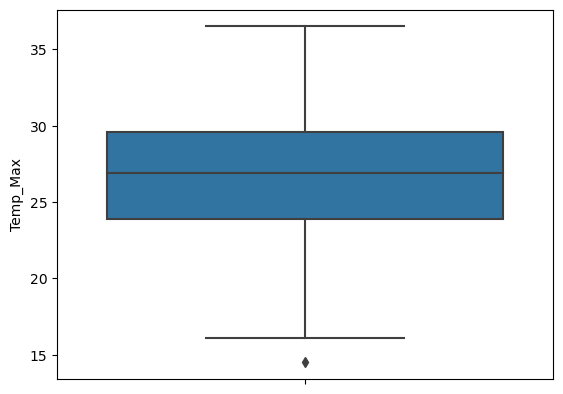

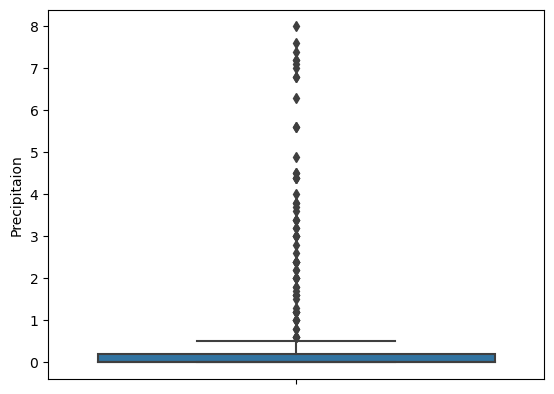

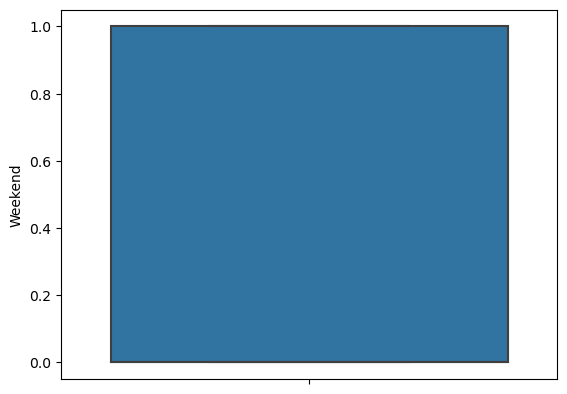

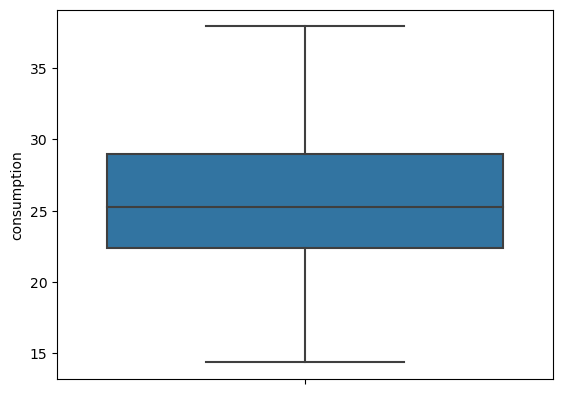

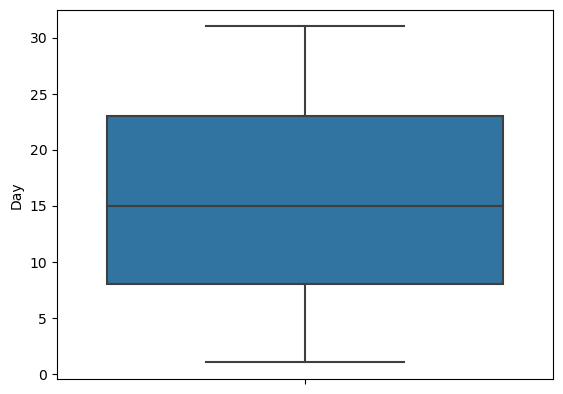

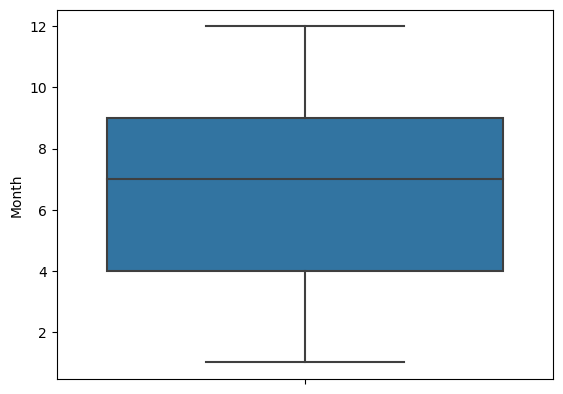

In [86]:
for i in data.columns:
    if data[i].dtype!= "object":
        sns.boxplot(y=data[i])
        plt.show()

#### Treating Outlier

In [32]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [33]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

In [34]:
data.dropna(inplace=True)

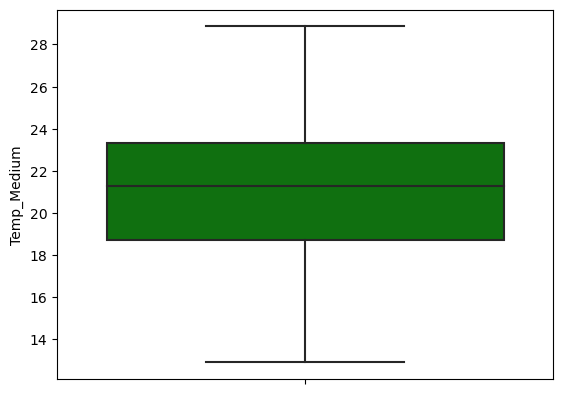

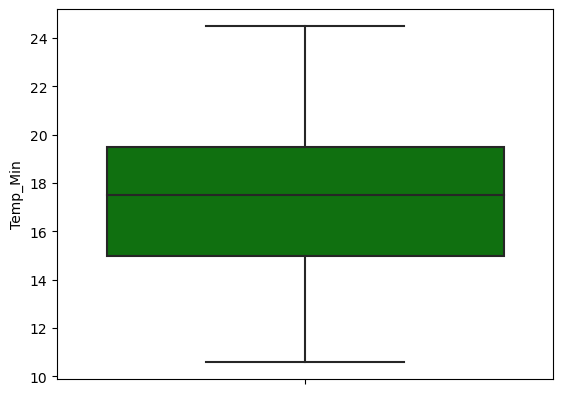

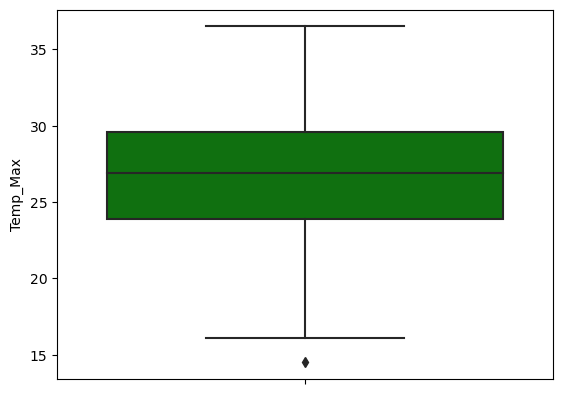

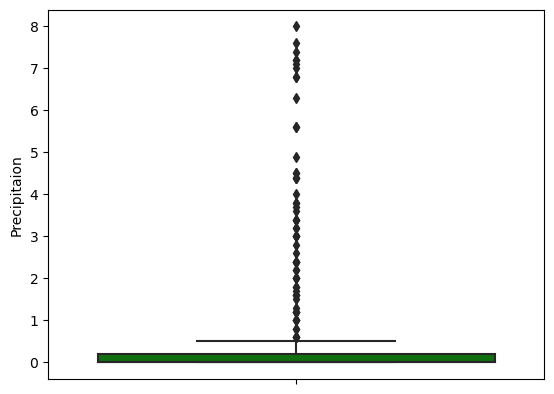

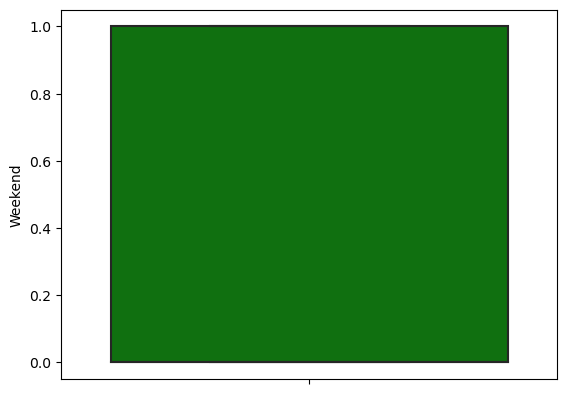

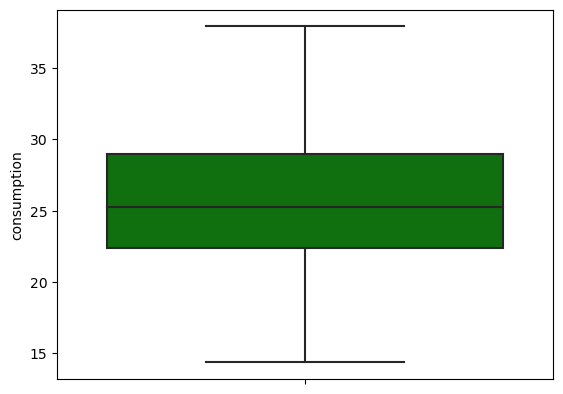

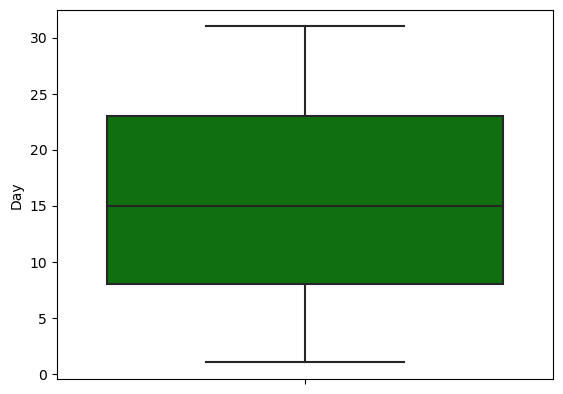

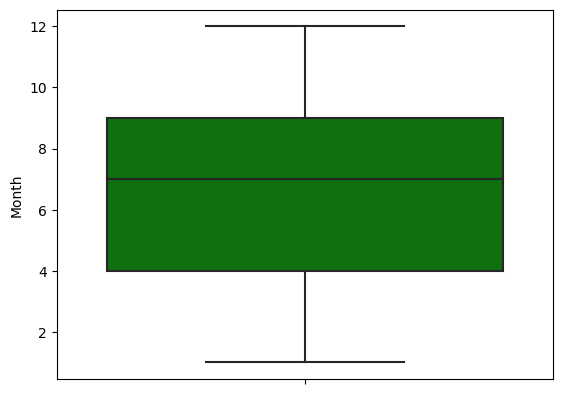

In [35]:
for i in data.columns:
    if data[i].dtype!= "object":
        sns.boxplot(y=data[i], color="Green")
        plt.show()

<div style="background-color:  green ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> EXPLORATORY DATA ANALYSIS(EDA)
</h1>
    
</div>


### Histogram

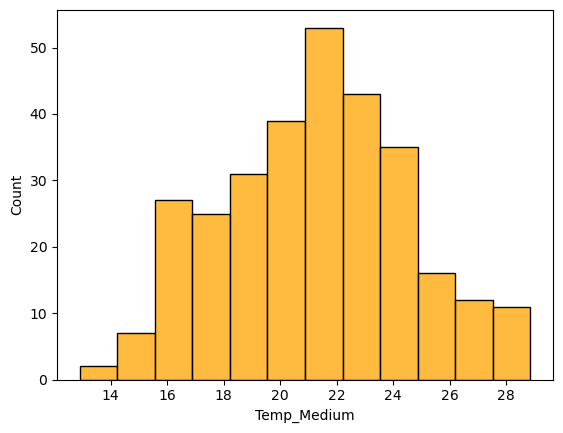

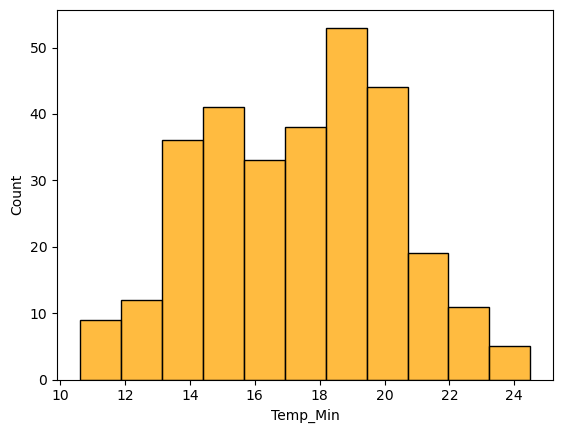

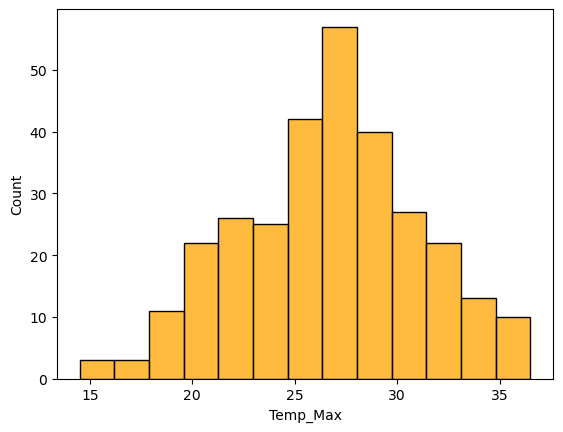

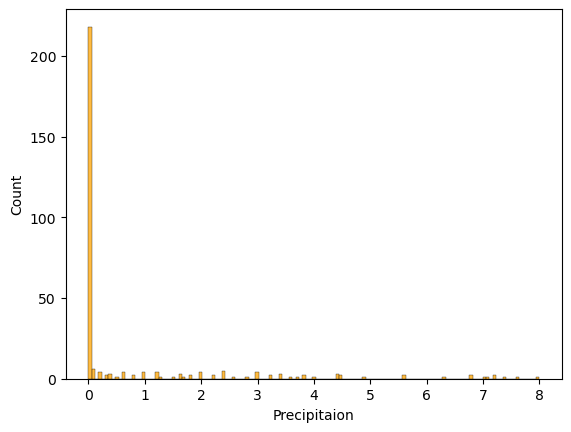

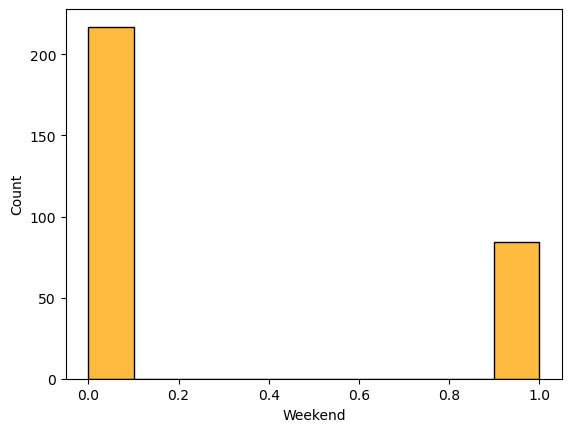

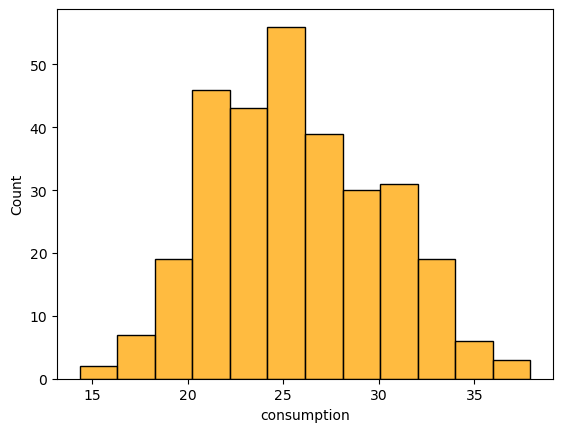

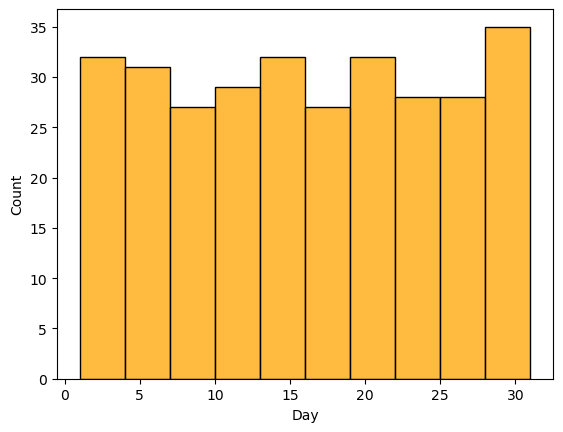

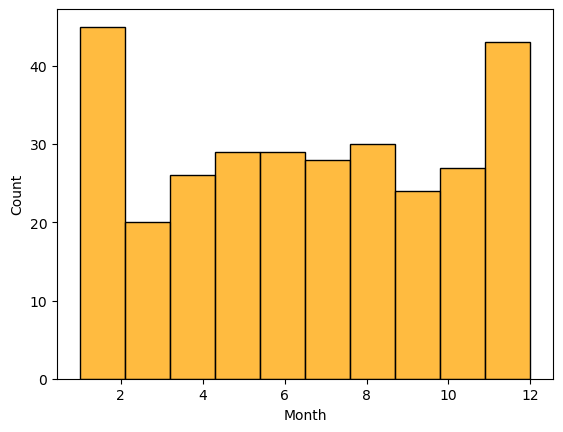

In [85]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.histplot(x=data[i],color='orange')
        plt.show()

### Kdeplot

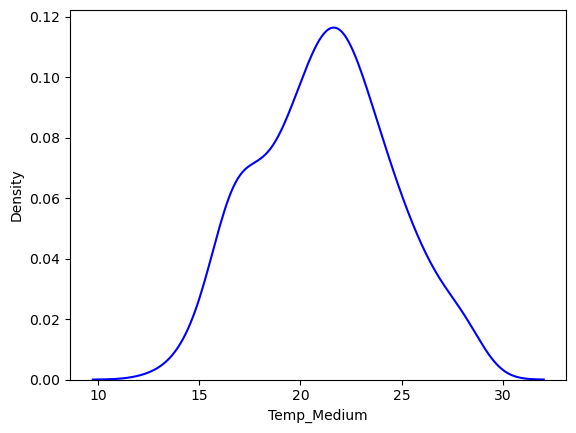

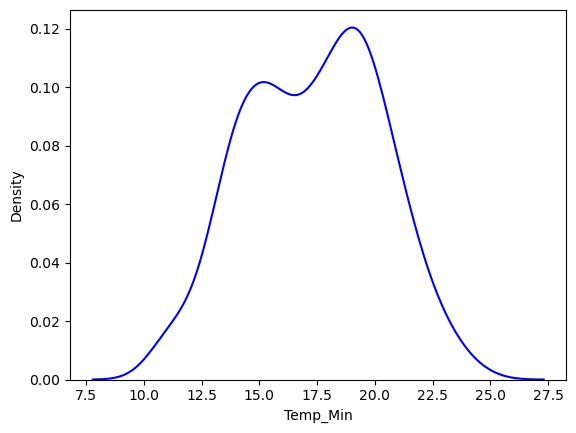

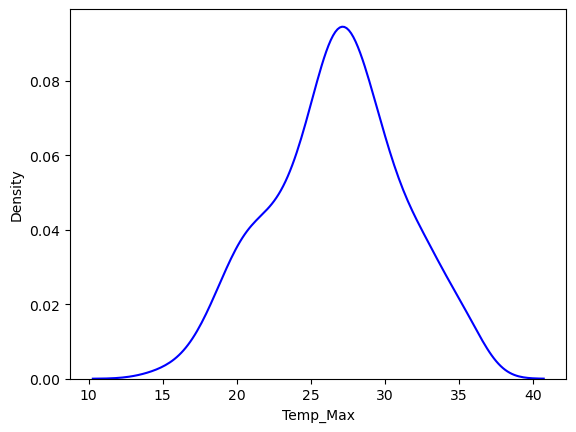

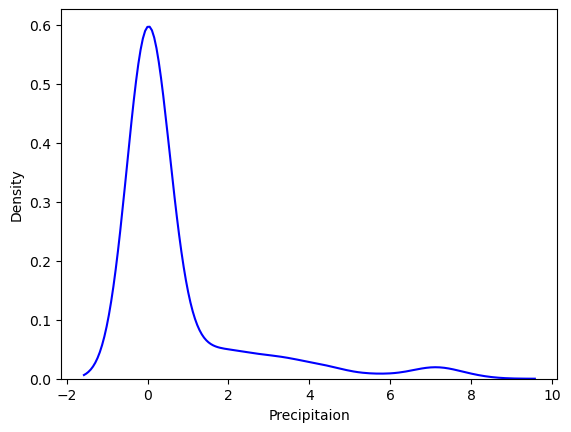

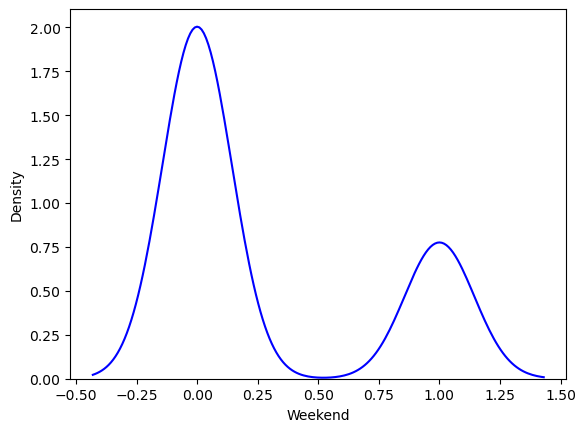

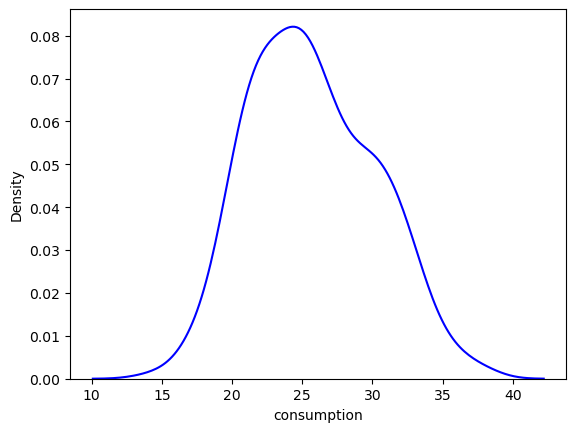

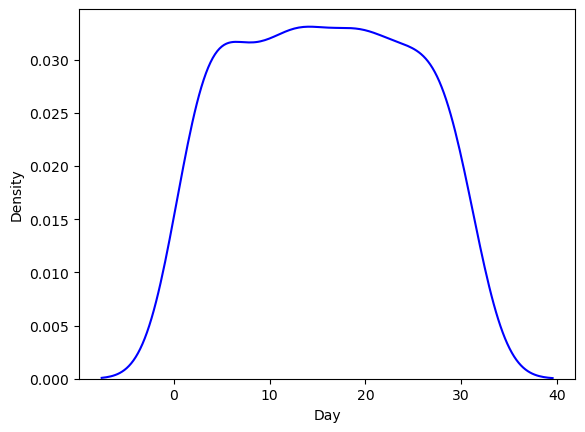

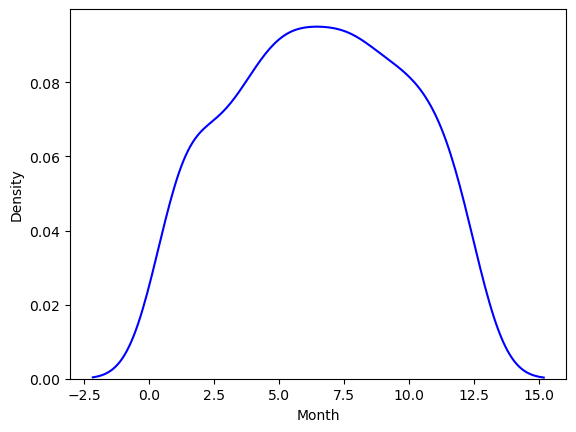

In [84]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i],color='blue')
        plt.show()

### Distplot

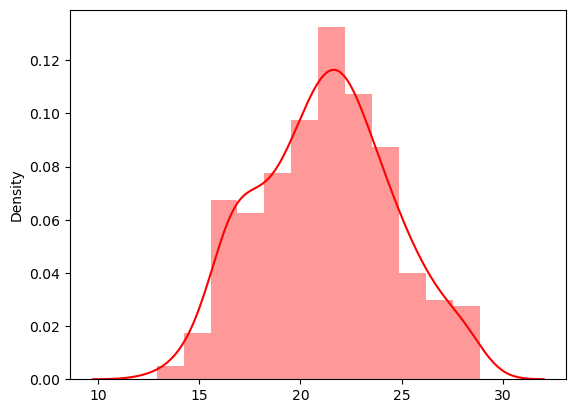

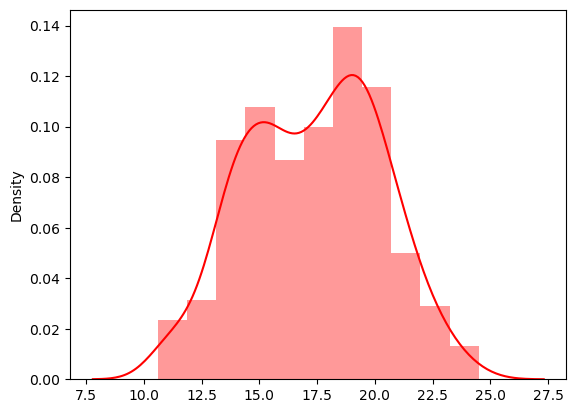

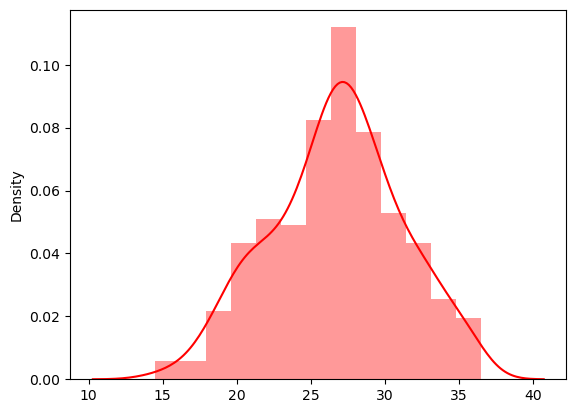

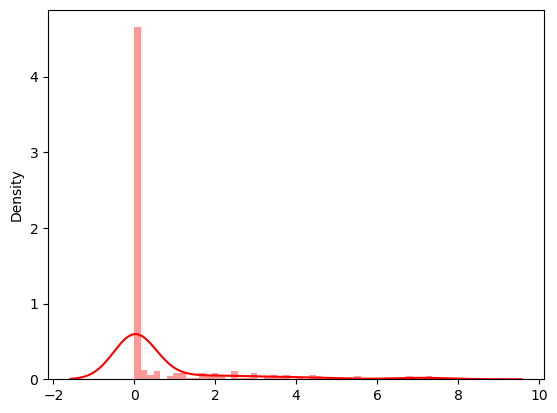

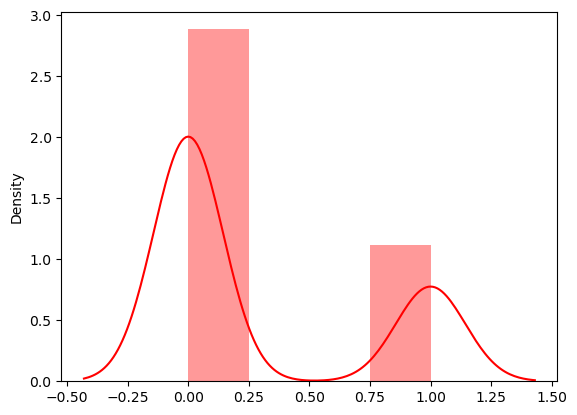

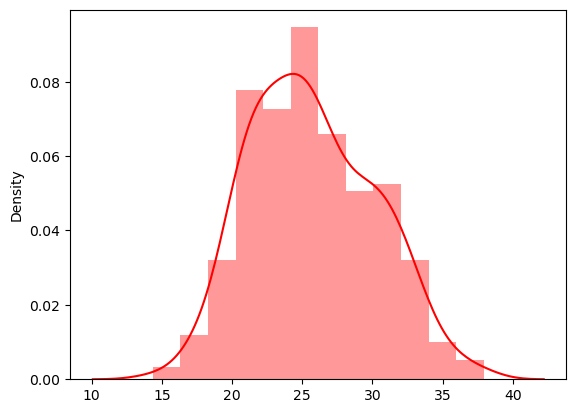

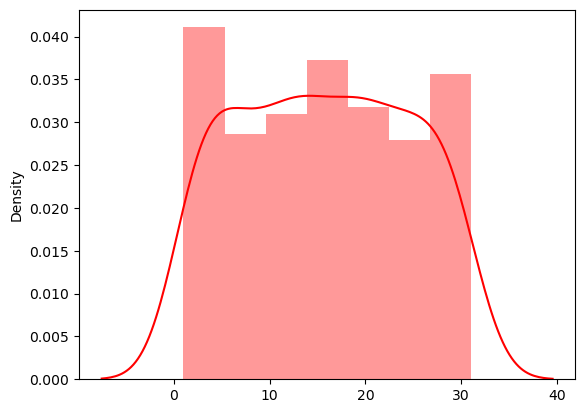

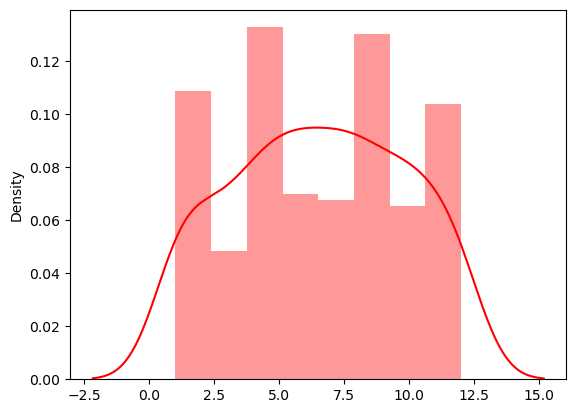

In [83]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.distplot(x =data[i],color='red' )
        plt.show()

### Violinplot

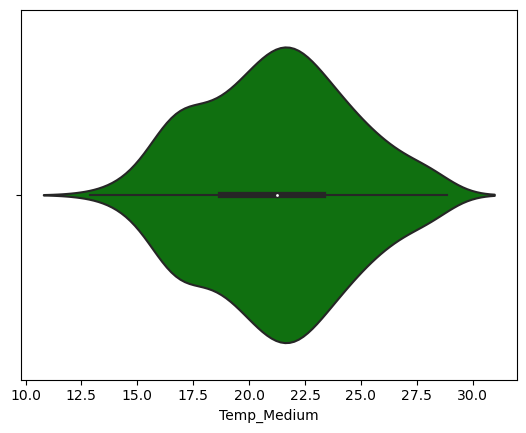

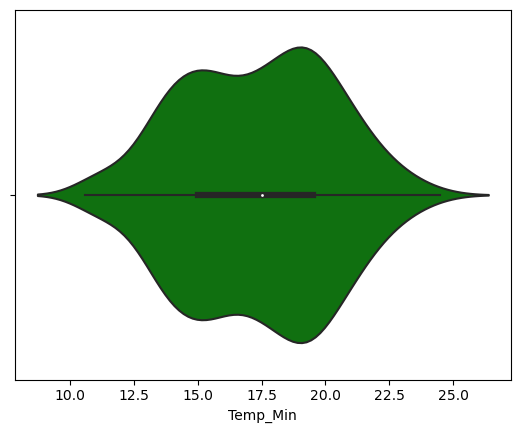

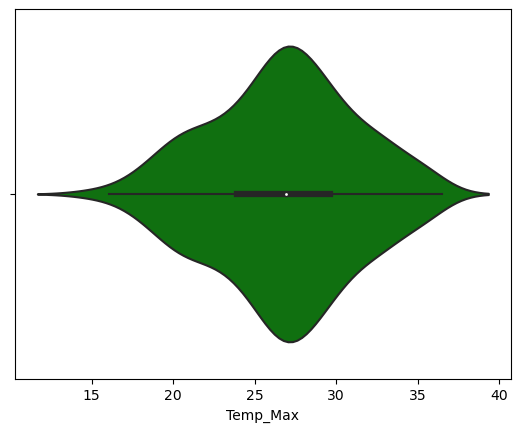

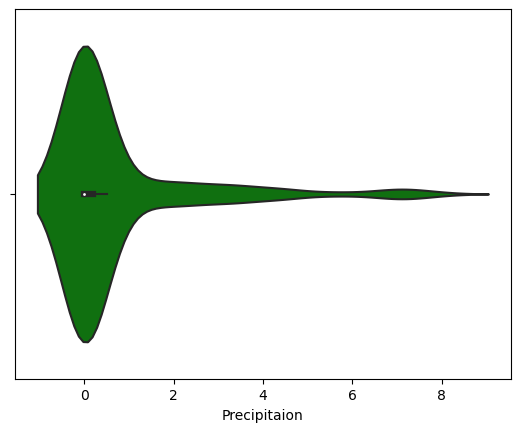

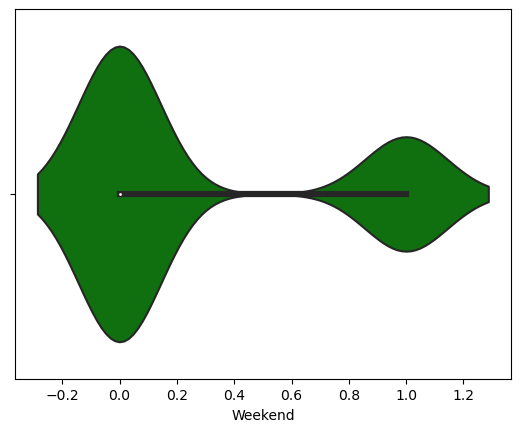

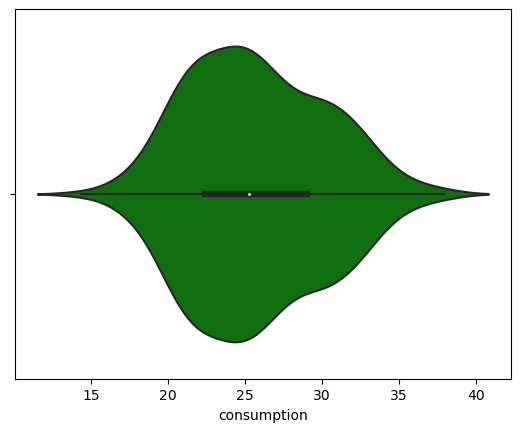

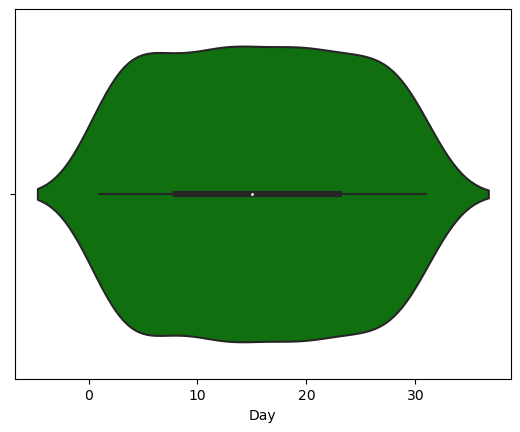

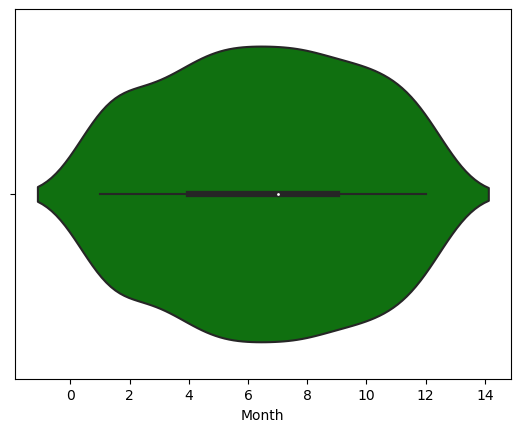

In [78]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.violinplot(x =data[i],color='green' )
        plt.show()

### Rugplot

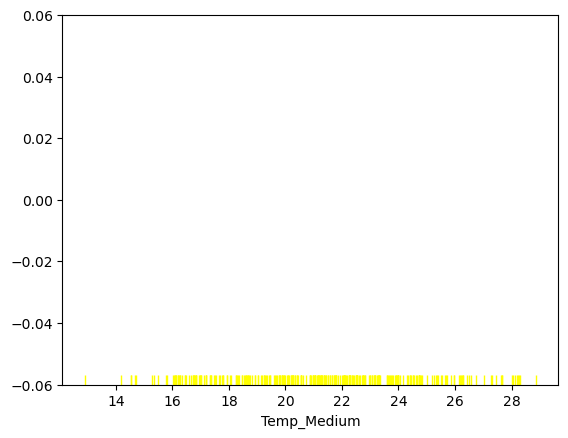

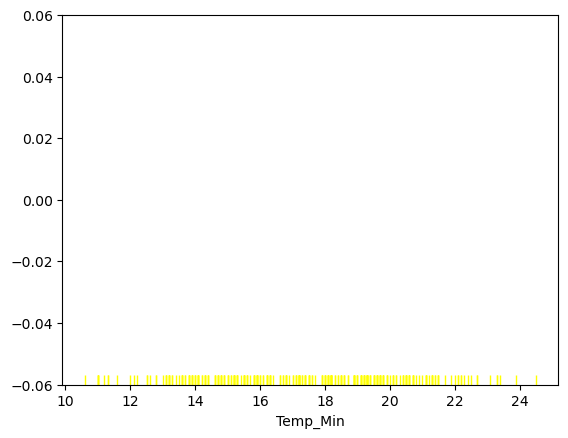

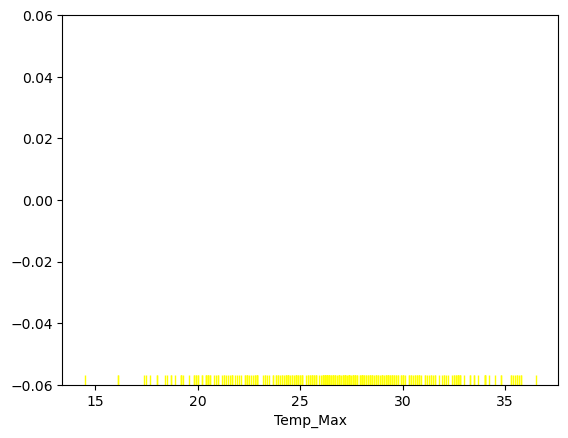

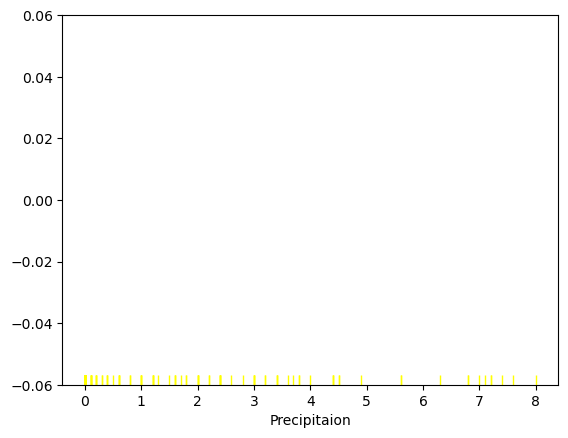

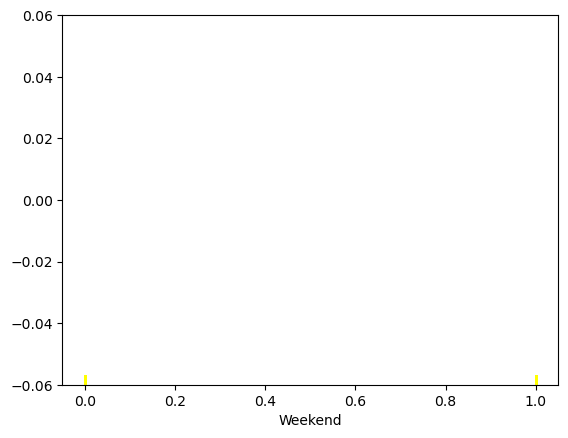

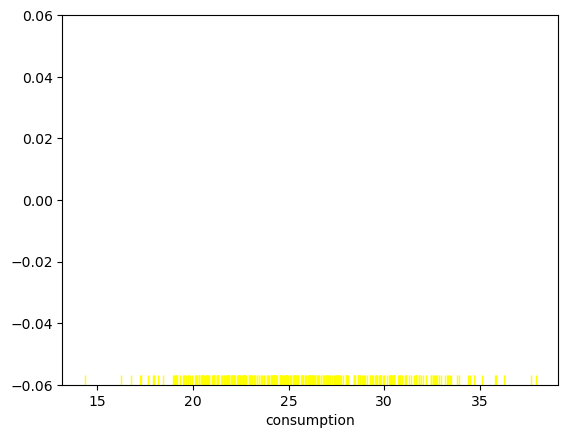

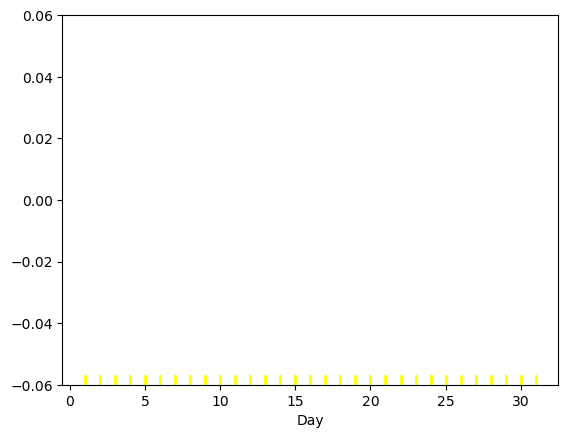

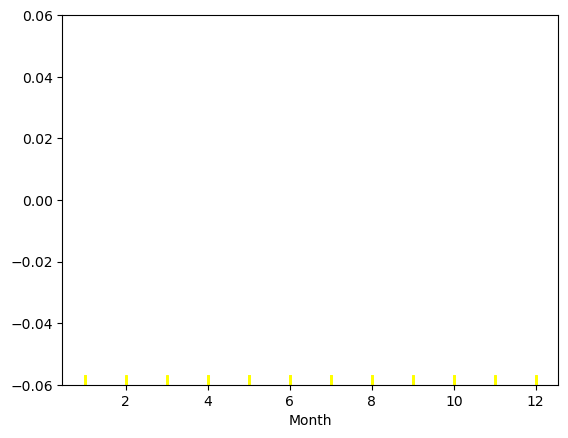

In [80]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.rugplot(x =data[i],color='yellow' )
        plt.show()

### Striplot

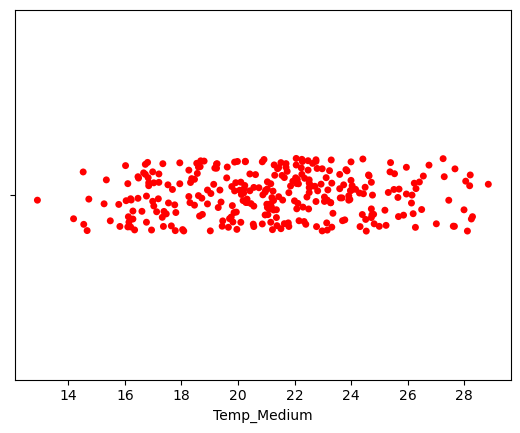

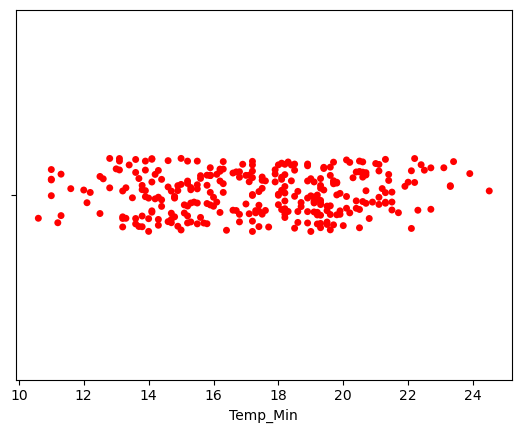

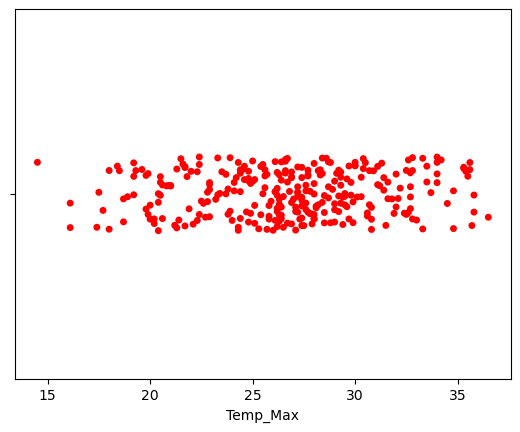

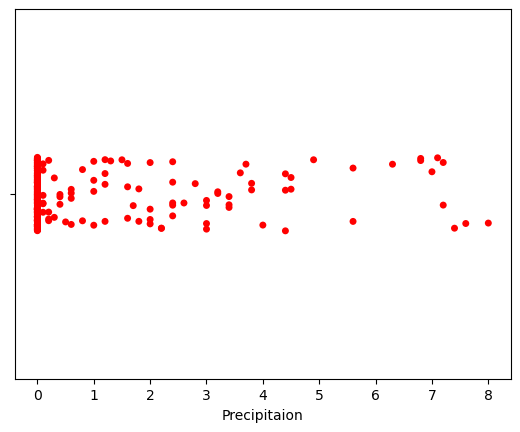

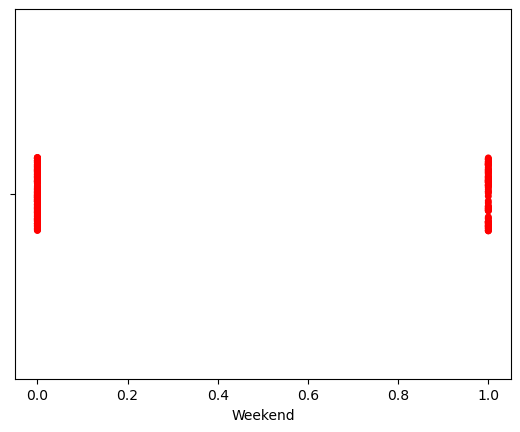

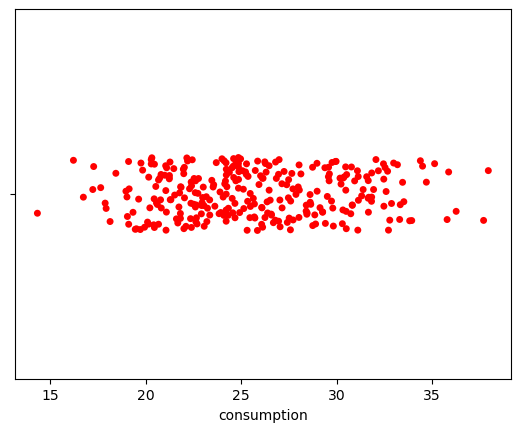

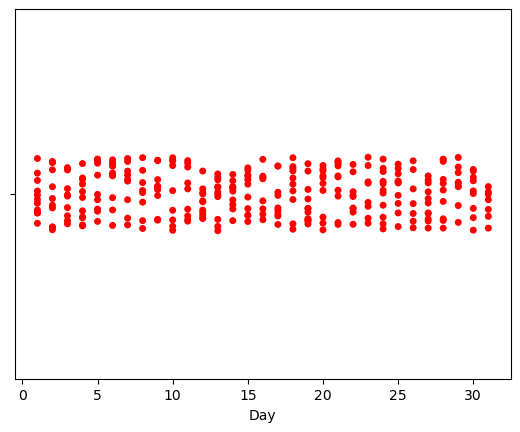

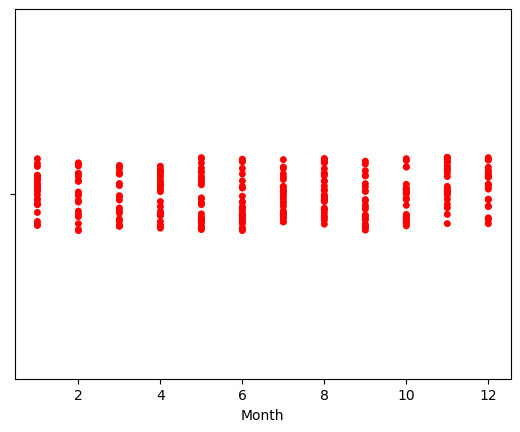

In [82]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.stripplot(x =data[i],color='red' )
        plt.show()

# <center>Multivariate analysis

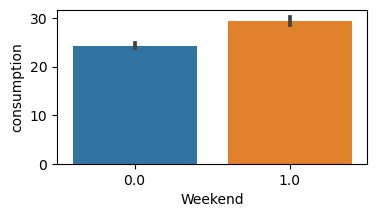

In [113]:
plt.figure(figsize=(4,2))
sns.barplot(data =data, x=data.Weekend, y=data.consumption);

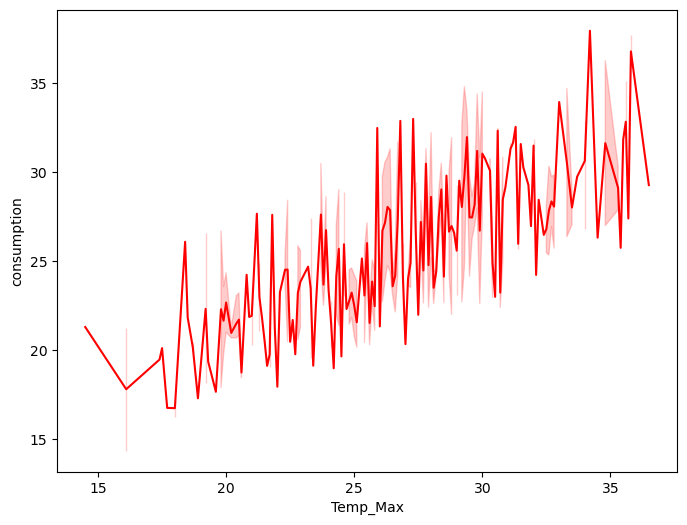

In [108]:
plt.figure(figsize=(8,6))
sns.lineplot(data = data, x=data.Temp_Max, y=data.consumption,color="red");

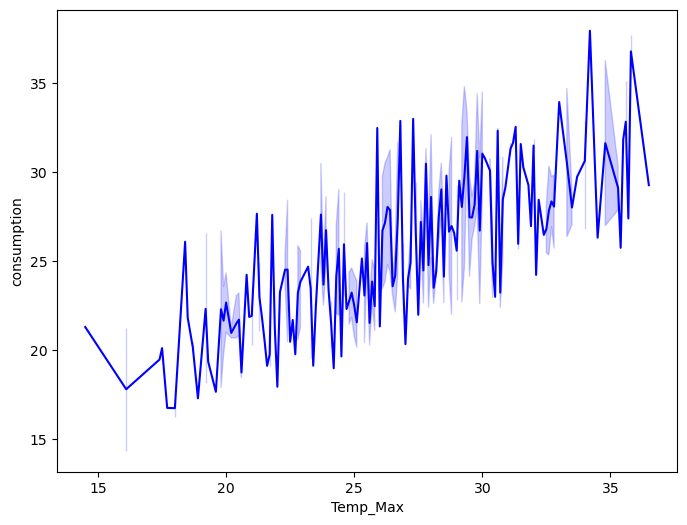

In [109]:
plt.figure(figsize=(8,6))
sns.lineplot(data = data, x=data.Temp_Max, y=data.consumption,color="blue");

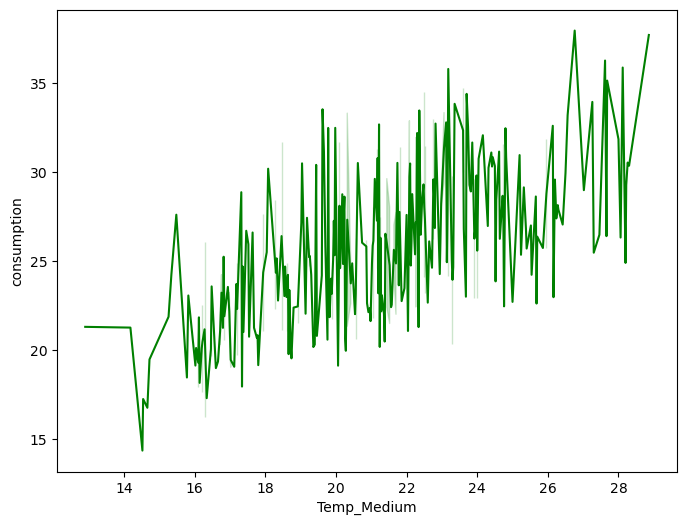

In [111]:
plt.figure(figsize=(8,6))
sns.lineplot(data = data, x=data.Temp_Medium, y=data.consumption,color="green");

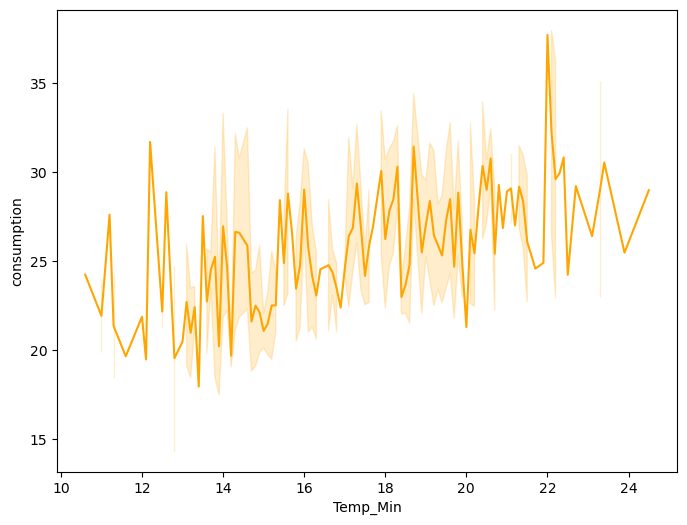

In [110]:
plt.figure(figsize=(8,6))
sns.lineplot(data = data, x=data.Temp_Min, y=data.consumption,color="orange");

### Barplot

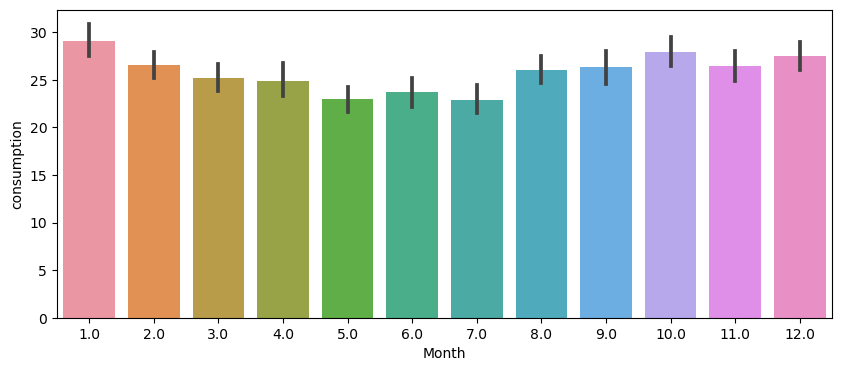

In [95]:
plt.figure(figsize=(10,4))
sns.barplot(data =data, x=data.Month, y=data.consumption);

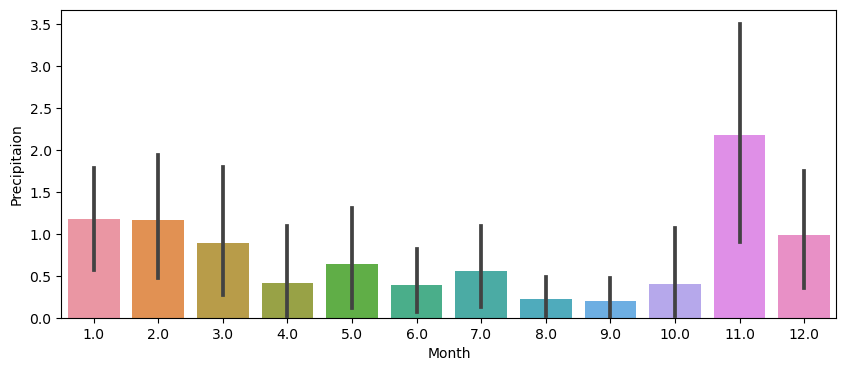

In [96]:
plt.figure(figsize=(10,4))
sns.barplot(data =data, x=data.Month, y=data.Precipitaion);

### Pairplot

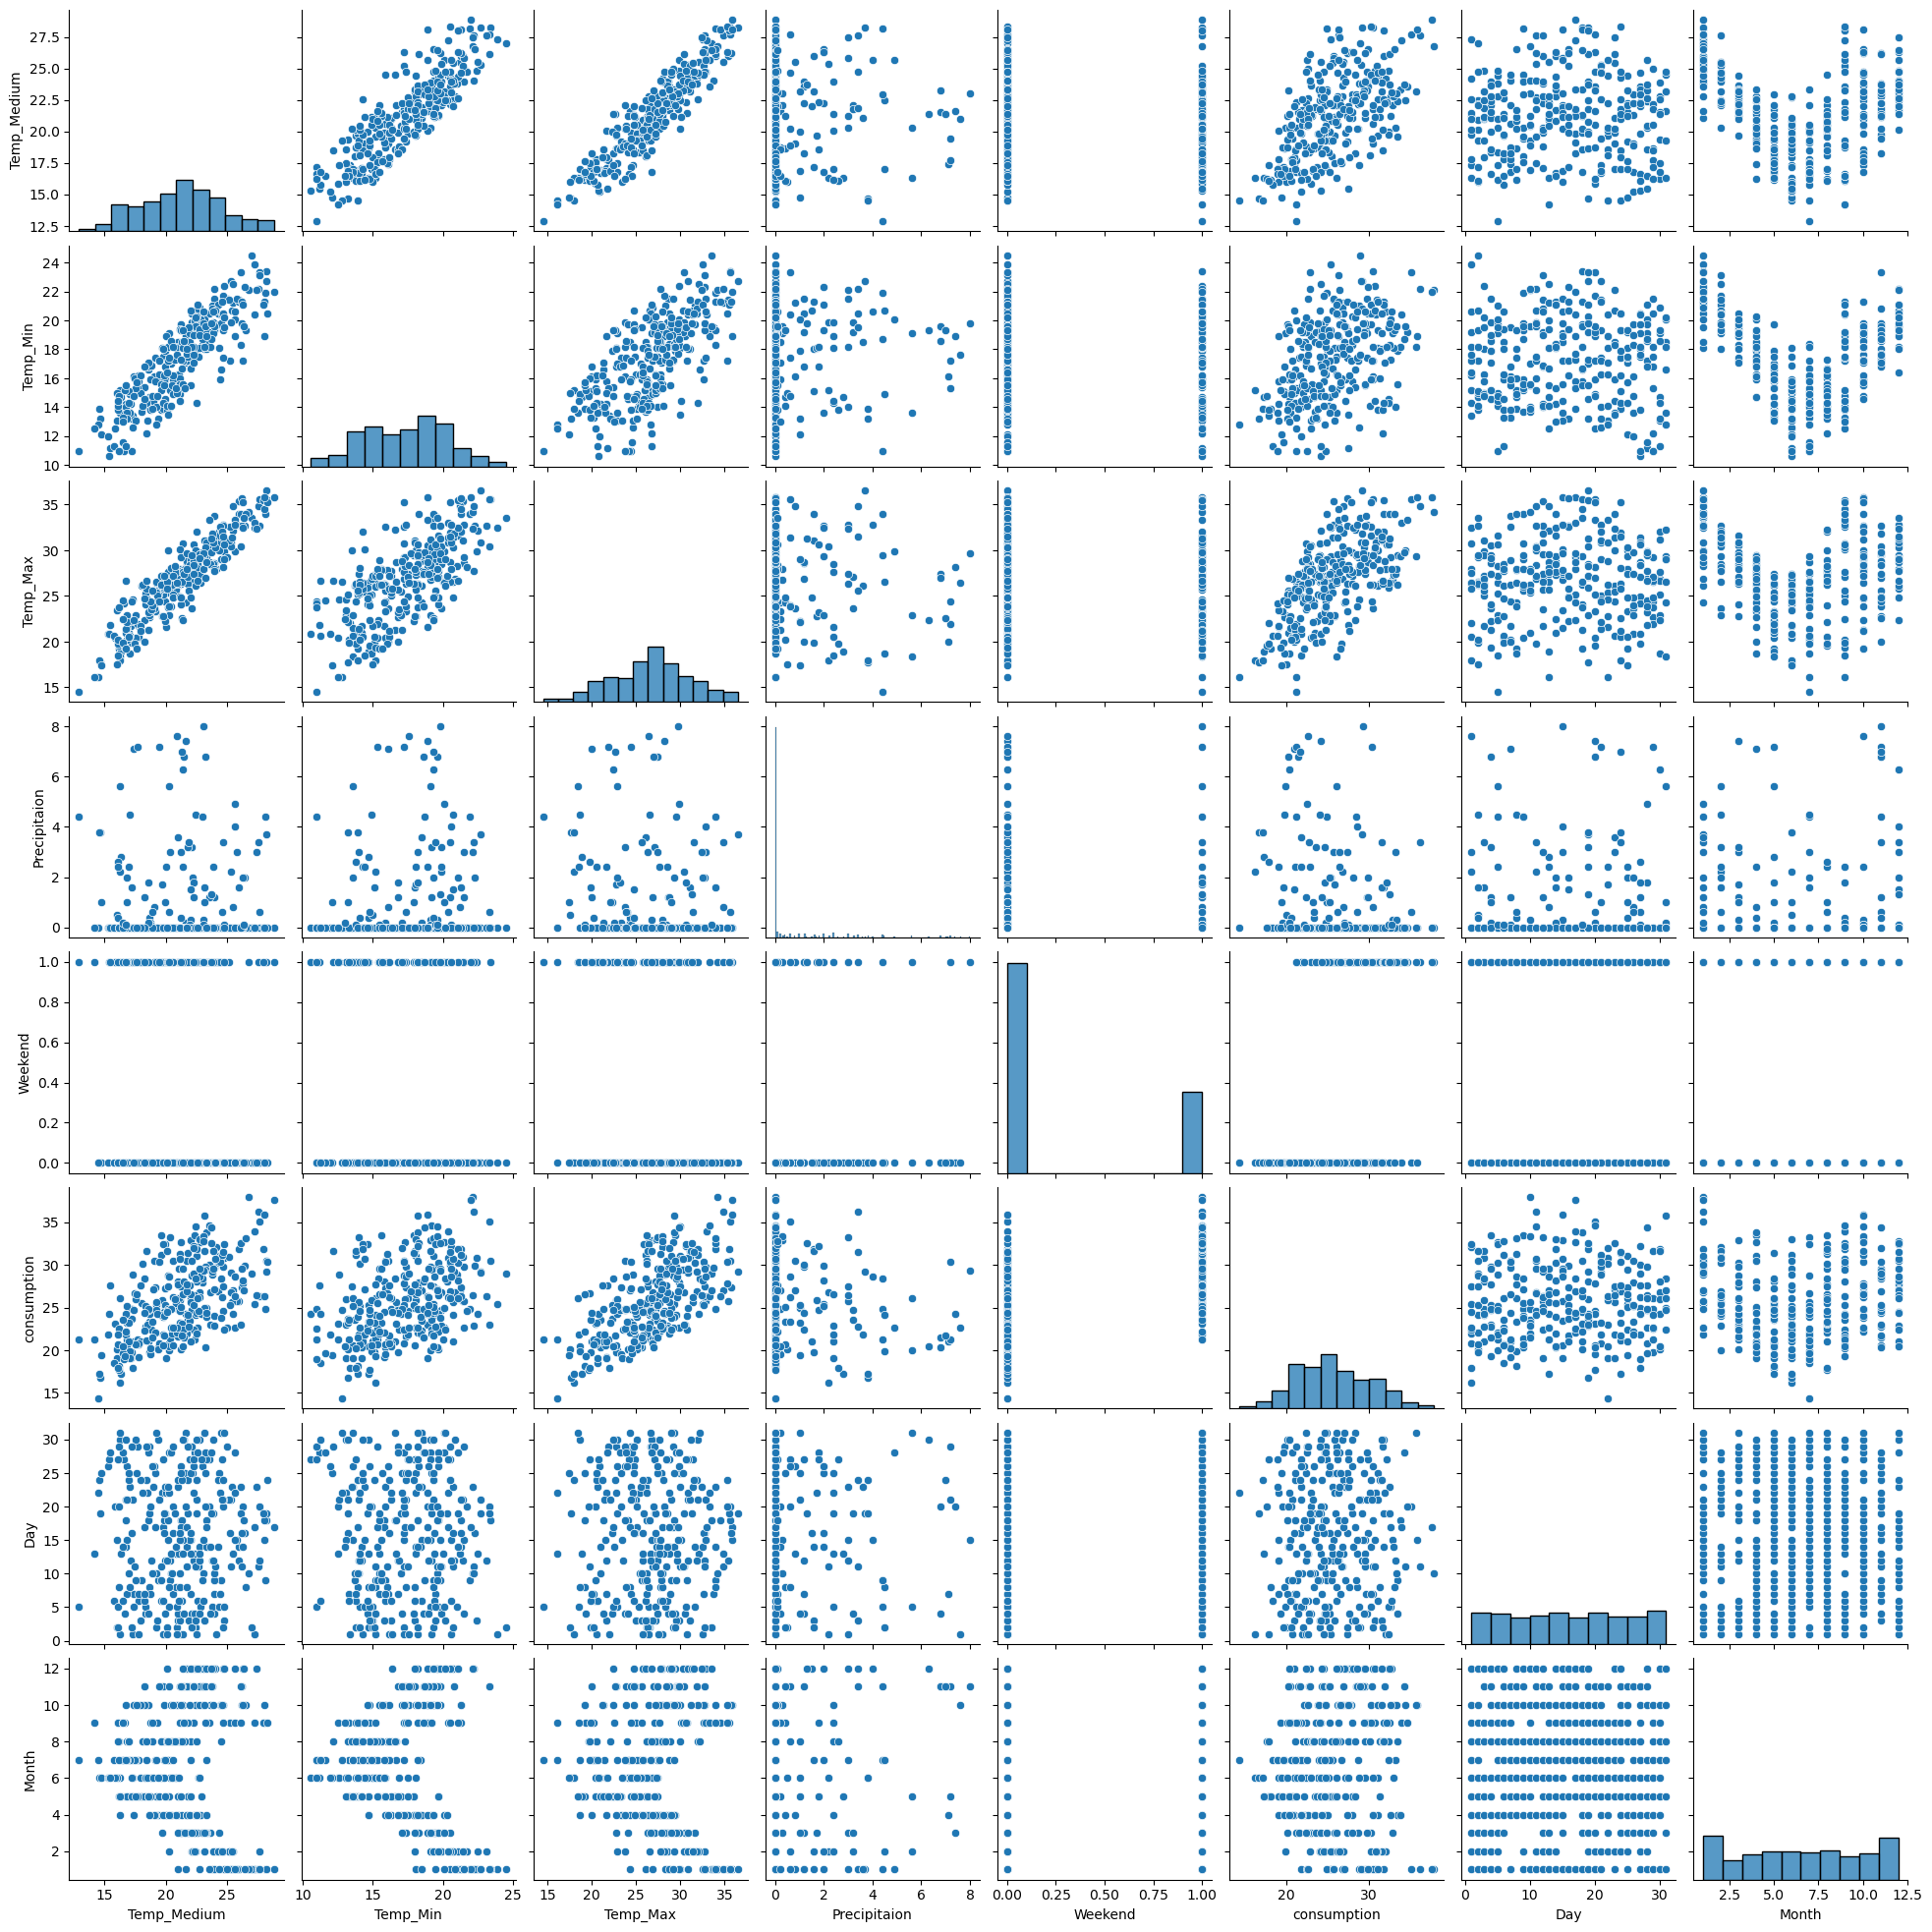

In [92]:
sns.pairplot( data )

#### Histogram

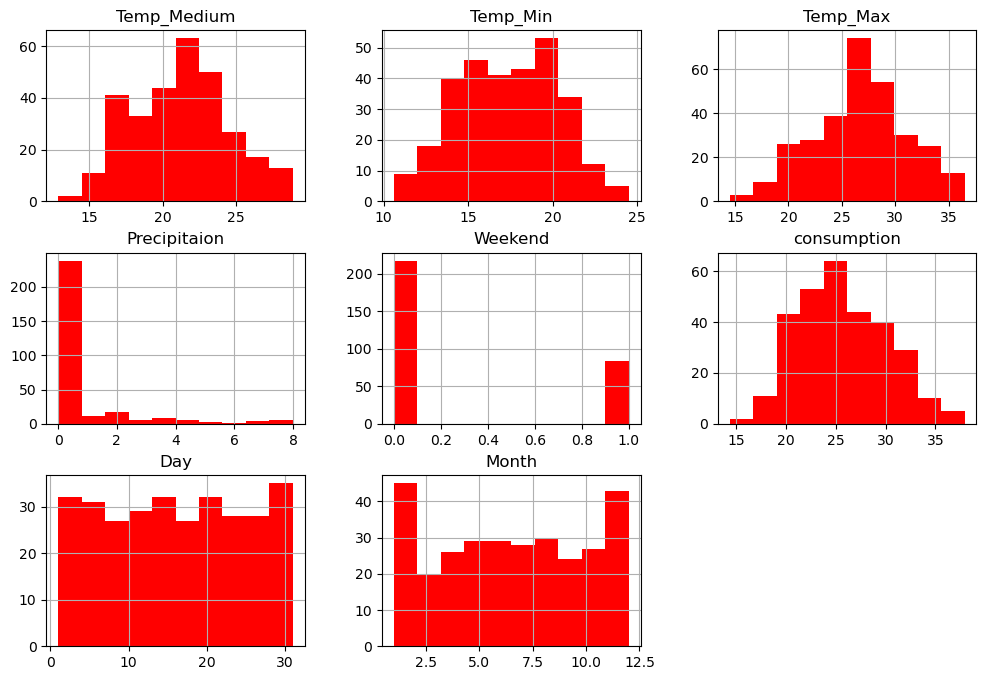

In [99]:
data.hist(figsize=(12,8),color="red");

#### Correlation matrix

<AxesSubplot:>

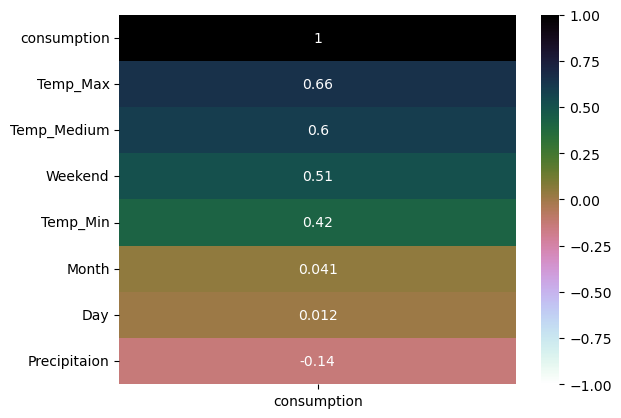

In [38]:
sns.heatmap(data.corr()[["consumption"]].sort_values(by="consumption", ascending=False), vmin=-1, vmax=1,annot=True, cmap="cubehelix_r")

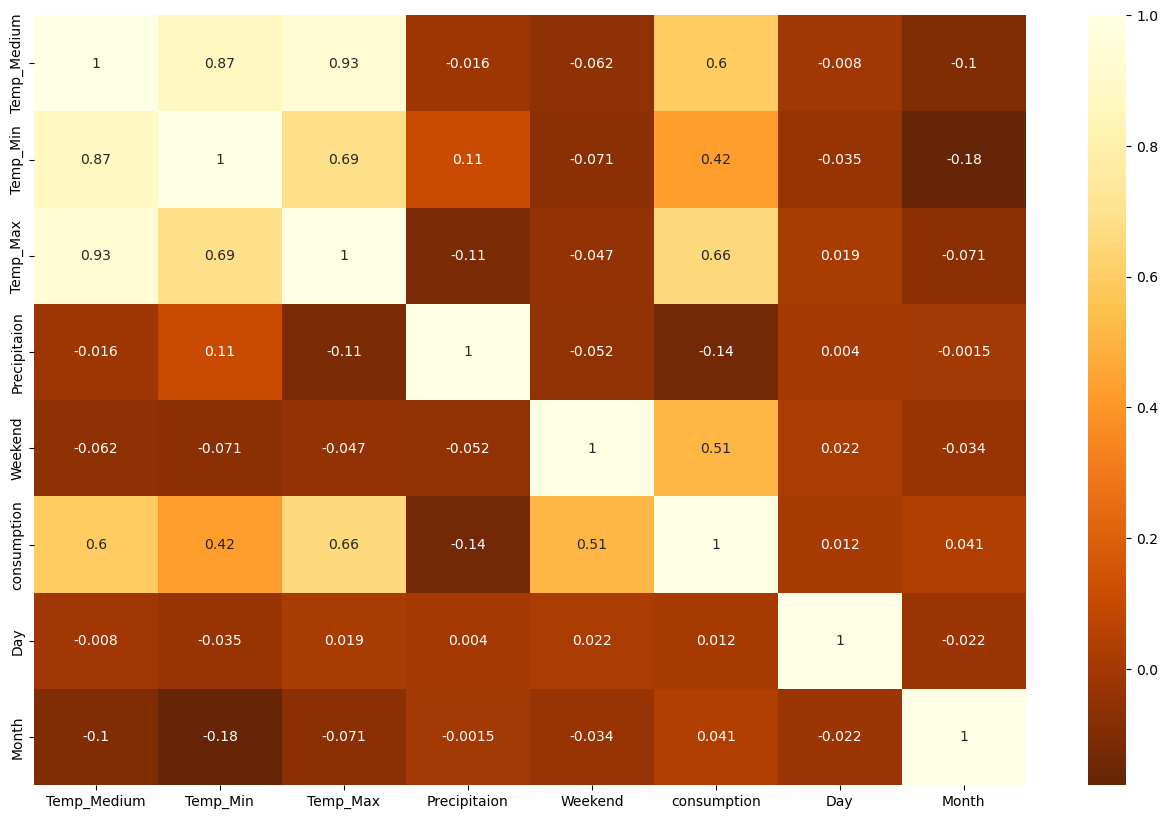

In [101]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap="YlOrBr_r")
plt.show()

<div style="background-color:  green ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> MODEL SELECTION AND TRAINING
</h1>
    
</div>

#### Only some columns are having good correlation with consumption. We may select only those for model building.

In [39]:
data.columns

Index(['Temp_Medium', 'Temp_Min', 'Temp_Max', 'Precipitaion', 'Weekend',
       'consumption', 'Day', 'Month'],
      dtype='object')

In [40]:
data_model = data[['Temp_Medium', 'Temp_Min', 'Temp_Max', 'Weekend', 'consumption']]

In [41]:
x = data_model.iloc[:, :-1].values

In [42]:
y = data_model.iloc[:,-1].values

In [43]:
x.shape

(301, 4)

In [44]:
y.shape

(301,)

#### Scaling the data

In [45]:
sc = StandardScaler()

In [46]:
x = sc.fit_transform(x)

##### Splitting the data into training and testing

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Model building

In [48]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

In [49]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  74.4417940896283
training_score:  71.98994007686612
testing_score:  74.4417940896283
mae:  2.011035187340503
mse:  5.535280291105774
rmse_test:  2.3527176394769036
****************************************************************************************************
model trained with Ridge
r2score:  74.48027413164967
training_score:  71.98819023649772
testing_score:  74.48027413164967
mae:  2.0111702448867494
mse:  5.5269464581697445
rmse_test:  2.3509458645765844
****************************************************************************************************
model trained with LinearSVR
r2score:  75.37135977587678
training_score:  70.52129770387484
testing_score:  75.37135977587678
mae:  1.9704604967457018
mse:  5.333959171758686
rmse_test:  2.309536570777498
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  54.5688322472334
training_sc

#### Lets proced with Random Forest Regressor.

### Hyper parameter tuning

In [50]:
rfr = RandomForestRegressor(random_state=0)

##### Setting the parameters

In [51]:
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10], 'bootstrap': [True, False]}


In [52]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=0, n_jobs=-1, return_train_score=True)

In [53]:
rfr_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [54]:
rfr_random.best_params_

{'n_estimators': 12, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}

In [55]:
rfr_best = RandomForestRegressor(n_estimators=12, max_features="auto", max_depth=5, bootstrap=True)

In [56]:
rfr_best.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=12)

##### Metrics after Hyper parameter tuning

In [57]:
training_score = rfr_best.score(x_train, y_train)*100
testing_score = rfr_best.score(x_test, y_test)*100
score = r2_score(y_test, rfr_best.predict(x_test))*100
mae = mean_absolute_error(y_test, rfr_best.predict(x_test))
mse = mean_squared_error(y_test, rfr_best.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

r2score:  72.57633841920715
training_score:  81.59403361542724
testing_score:  72.57633841920715
mae:  2.02162108985781
mse:  5.939292217554157
rmse_test:  2.4370663137375144


##### We have slighly improved the perfomance. 

<div style="background-color:  green ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> EVALUATION
</h1>
    
</div>

In [58]:
y_pred = rfr_best.predict(x)

In [59]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"))
OUTPUT.head()

,ACTUAL,PREDICTED
0,25.461,26.956533
1,28.972,28.421957
2,30.814,31.925064
3,29.799,30.762549
4,28.900,25.104432


<div style="background-color:  green ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> Visualizing the Prediction

</h1>
    
</div>

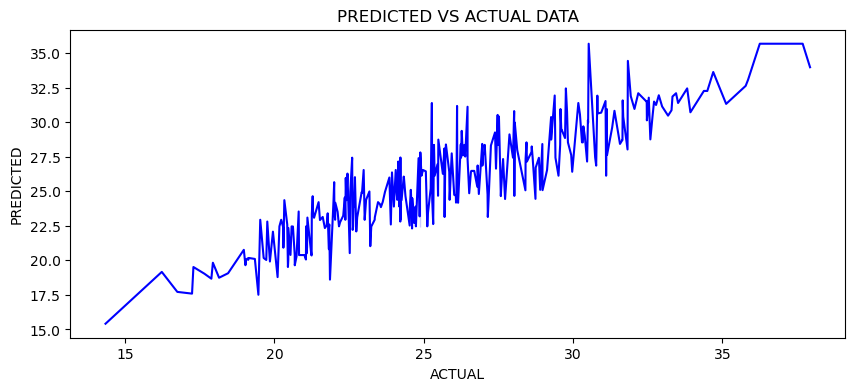

In [102]:
plt.figure(figsize=(10,4))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT, x="ACTUAL", y = "PREDICTED",color="blue");

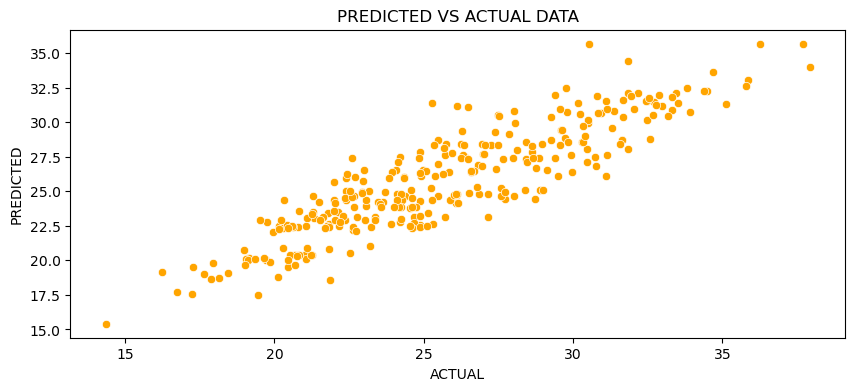

In [103]:
plt.figure(figsize=(10,4))
plt.title("PREDICTED VS ACTUAL DATA")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y = "PREDICTED",color="orange");

# <center>Conclusion

### Based on the regression analysis performed on the beer consumption prediction, the following conclusions can be drawn:

->Relationship between variables: The regression analysis helps identify the relationship between the independent variables (such as temperature, precipitation, holiday indicators, or day of the week) and the dependent variable (beer consumption). It provides insights into how changes in the independent variables impact beer consumption.

->Statistical significance: The regression analysis provides statistical measures, such as coefficients and p-values, to assess the significance of the independent variables in explaining the variation in beer consumption. A significant p-value indicates that the variable has a meaningful impact on beer consumption.

->Predictive power: The regression model can be used to predict beer consumption based on the identified relationships. By inputting values for the independent variables, the model can generate predictions for the expected beer consumption.

->Model evaluation: Various metrics, such as R-squared (coefficient of determination), adjusted R-squared, and root mean squared error (RMSE), can be used to evaluate the performance of the regression model. A higher R-squared value and a lower RMSE indicate a better fit of the model to the data.

->Assumptions: Regression analysis relies on assumptions, including linearity, independence of errors, homoscedasticity, and normality of residuals. It is important to assess these assumptions to ensure the validity of the regression model and the reliability of its predictions.

->Limitations: Regression analysis has its limitations, such as the assumption of a linear relationship between variables, potential presence of multicollinearity, and the inability to capture all factors that influence beer consumption. Other external factors, such as marketing campaigns, local events, or cultural factors, may also impact beer consumption and should be considered in conjunction with the regression analysis.

It is crucial to note that the accuracy and reliability of the predictions depend on the quality of the data, the choice of independent variables, and the suitability of the regression model for the specific dataset. Regular model evaluation and updating based on new data are essential for maintaining accurate predictions. Additionally, it may be valuable to explore other modeling techniques, such as time series analysis or machine learning algorithms, to compare their performance against the regression model.